<a href="https://colab.research.google.com/github/TatarinovaEM758/Machine_learning/blob/main/ML3_1_polynomial_features.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
data = pd.read_csv("https://raw.githubusercontent.com/koroteevmv/ML_course/refs/heads/main/ML3.1%20polynomial%20features/data/gen_regression.csv")

In [ ]:
data.head()

,Unnamed: 0,x,y
0,0,96.597780,97761.592016
1,1,48.002892,27613.989207
2,2,47.939756,29410.187753
3,3,47.809026,15789.597531
4,4,69.784427,20953.383453


In [ ]:
X = data.x
y = data.y

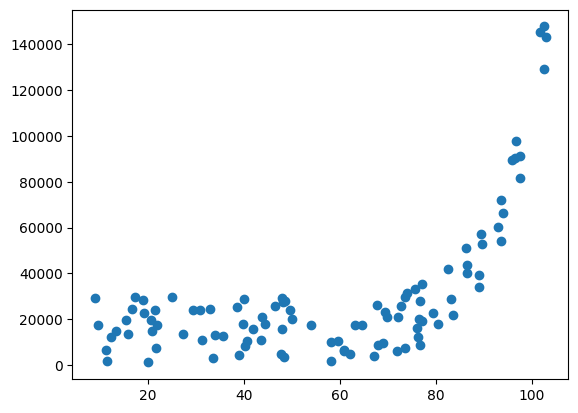

In [ ]:
plt.scatter(X, y)

Здесь мы видим наличие нелинейной зависимости между атрибутом и целевой переменной. Мы пока не знаем, какова именно эта зависимость и какая функция его приближает лучше всего. Мы будем пробовать строить полиномы разных степеней и смотреть, насколько точной получатся такие модели. Для эксперимента построим модель линейной регрессии.

In [ ]:
X = pd.DataFrame(X)

In [ ]:
from sklearn.linear_model import LinearRegression
linear = LinearRegression().fit(X, y)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


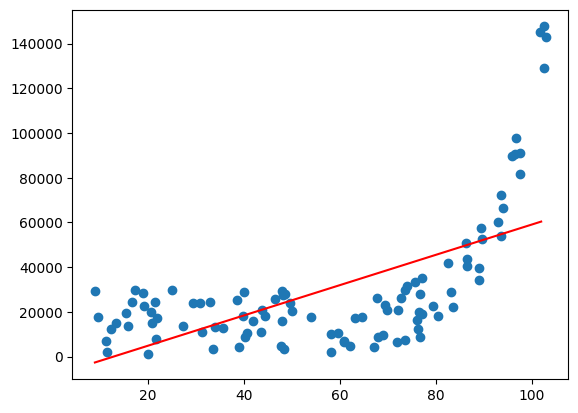

In [ ]:
xx = np.arange(X.x.min(axis=0), X.x.max(axis=0))
yy = linear.predict(pd.DataFrame(xx))

plt.scatter(X.x, y)
plt.plot(xx, yy, c='r')

Как и ожидалось, линейная модель не очень хорошо аппроксимирует наши данные. Для более точной оценки эффективности моделей выведем значение коэффициента детерминации:

In [ ]:
linear.score(X, y)

0.37467360318911636

Мы видим, что это значение (37%) довольно низко. Можно сделать обоснованный вывод о том, что данная модель имеет низкую точность.

Давайте попробуем построить полиномиальную регрессию второго порядка и посмотрим, улучшит ли это ситуацию. В библиотеке sklearn нет отдельного класса для полиномиальных моделей. Вместо этого, введение полиномиальных признаков происходит путем преобразования данных. Для этого служит специальный класс:

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

In [ ]:
transformation = PolynomialFeatures(degree=2)

Теперь надо "обучить" объект трансформации на нашем датасете. Все объекты sklearn специально сделаны очень похоже по интерфейсу на модели машинного обучения. Это очень полезно при их комбинировании в конвейеры. Об этом поговорим позже. Сейчас нужно "подстроить" объект трансформации под наши данные:

In [ ]:
transformation.fit(X)

PolynomialFeatures()

In [ ]:
X_2 = transformation.transform(X)

Мы всегда рекомендуем в таких случаях создавать именно новую переменную, а не перезаписывать имеющуюся. Это избавит нас от многих проблем при отладке и повторном выполнении кода.

In [ ]:
X_2.shape
X_2[:5]

array([[1.00000000e+00, 9.65977805e+01, 9.33113119e+03],
       [1.00000000e+00, 4.80028921e+01, 2.30427765e+03],
       [1.00000000e+00, 4.79397558e+01, 2.29822018e+03],
       [1.00000000e+00, 4.78090258e+01, 2.28570295e+03],
       [1.00000000e+00, 6.97844271e+01, 4.86986627e+03]])

Мы видим, что он состоит из трех колонок. Первая - это автоматически добавляемая колонка, состоящая из одних единиц (так называемый bias). Ее добавление можно отключить. Вторая - это наш исходный x. А третья - это как раз x 2 - то есть полиномиальный признак.

In [ ]:
poly_2d = LinearRegression().fit(X_2, y)

Мы построили полиномиальную модель и хотим изобразить ее на графике. Для этого мы можем использовать уже имеющийся у нас массив xx. Но его теперь нужно преобразовать. Причем преобразовать именно так, как мы преобразовывали сам датасет. Именно для этого и служит объект трансформации. Единожды обучив его мы можем трансформировать единообразно сколько угодно разных датасетов.

In [ ]:
xx_2d = transformation.transform(pd.DataFrame(xx))

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


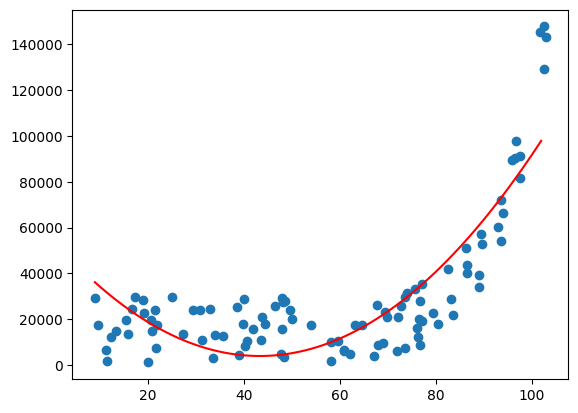

In [ ]:
yy_2d = poly_2d.predict(xx_2d)
plt.scatter(X.x, y)
plt.plot(xx, yy_2d, c='r')

На графике мы видим, что линия регрессии уже стала кривой - это и есть наша кривая второго порядка. Она, как видно, гораздо ближе к точкам, чем линейна функция. Это численно подтверждает и значение коэффициента детерминации второй модели

In [ ]:
poly_2d.score(X_2, y)

0.7359753787024842

Таким образом можно сделать вывод, что вторая модель (полиномиальная регрессия второго порядка) значительно лучше первой (линейной) описывает точки нашего набора данных. А значи эта модель будет давать гораздо более точные предсказания.

## В качестве второго примера разберем применение полиномиальных моделей для задач классификации. Вы увидите, что на практике это не сильно отличается от их применения в задачах регрессии.


In [ ]:
data = pd.read_csv("https://raw.githubusercontent.com/koroteevmv/ML_course/2023/ML3.1%20polynomial%20features/gen_classification.csv",
                   index_col=0)

In [ ]:
y = data.y
X = data.drop(["y"], axis=1)

Построим этот датасет на графике. При предварительном анализе данных мы должны были увидеть, что в целевой переменной содержится всего два значения. Это значит, что перед нами задача бинарной классификации:

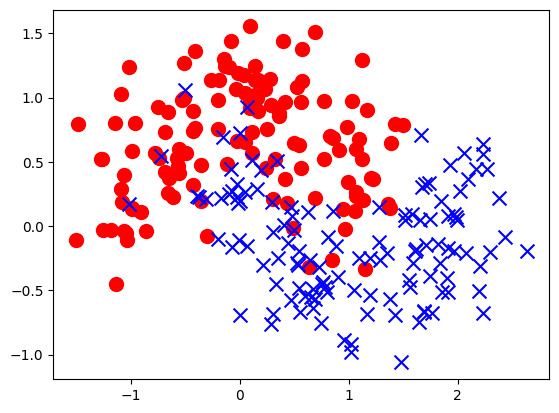

In [ ]:
plt.scatter(X.iloc[:, 0][y==0], X.iloc[:, 1][y==0], marker="o", c='r', s=100)
plt.scatter(X.iloc[:, 0][y==1], X.iloc[:, 1][y==1], marker="x", c='b', s=100)

На графике ясно видно, что мы имеем дело с линейно неразделимым датасетом. Это может быть прямым показанием к использованию полиномиальной модели:

Но для начала, как всегда построим самую простую - линейную - модель. Так как мы имеем дело с классификацией, нам понадобится модель логистической регрессии.

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
logistic = LogisticRegression().fit(X, y)

<ipython-input-29-bc09005cf8c9>:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  np.arange(X.min()[0], X.max()[0]+0.1, 0.01),
<ipython-input-29-bc09005cf8c9>:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  np.arange(X.min()[1], X.max()[1]+0.1, 0.01))
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


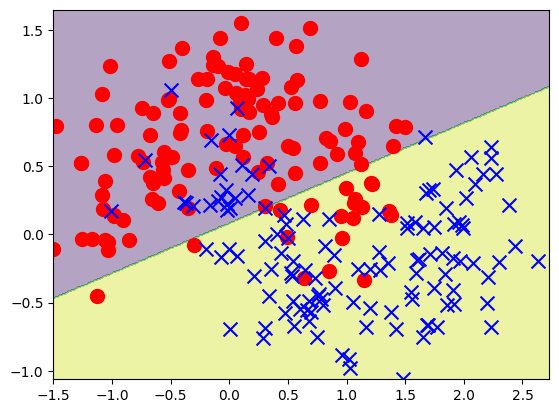

In [ ]:
xx, yy = np.meshgrid(
    np.arange(X.min()[0], X.max()[0]+0.1, 0.01),
    np.arange(X.min()[1], X.max()[1]+0.1, 0.01))
XX = np.array(list(zip(xx.ravel(), yy.ravel()))).reshape((-1, 2))

Z = logistic.predict(XX).reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.4)
plt.scatter(X.iloc[:, 0][y==0], X.iloc[:, 1][y==0], marker="o", c='r', s=100)
plt.scatter(X.iloc[:, 0][y==1], X.iloc[:, 1][y==1], marker="x", c='b', s=100)

Мы увидим линейную границу принятия решений:
Очевидно, такая модель часто ошибается и не очень точна. Чтобы подтвердить такой вывод мы выведем значение метрики точности для нашей модели:

In [ ]:
logistic.score(X, y)

0.832

Точность в 83% может показаться удовлетворительно, но из графика видно, насколько часто модель относит точки к неправильному классу. При анализе графика также можно предположить, что нелинейная (полиномиальная) граница принятия решения может нам существенно помочь.

Для построения нелинейной модели также создадим объект преобразования и применим его на нашей обучающей выборке (матрице атрибутов). Но сейчас мы сделаем все тоже самое короче. Для этого можно воспользоваться методом fit_transform(), который подстраивает преобразование и сразу применяет его

In [ ]:
class_transform = PolynomialFeatures(degree=3, include_bias=False)
X_3 = class_transform.fit_transform(X)

In [ ]:
X_3.shape

(250, 9)

In [ ]:
class_3 = LogisticRegression().fit(X_3, y)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


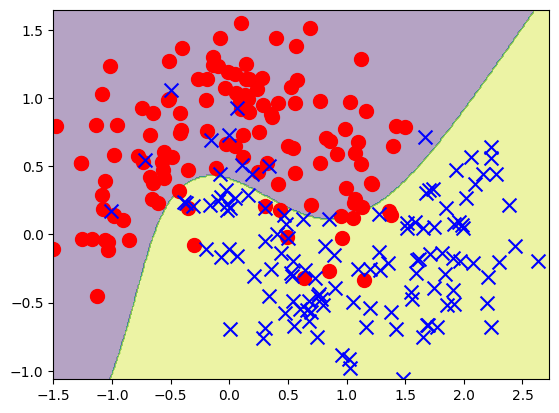

In [ ]:
Z = class_3.predict(class_transform.transform(XX)).reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.4)
plt.scatter(X.iloc[:, 0][y==0], X.iloc[:, 1][y==0], marker="o", c='r', s=100)
plt.scatter(X.iloc[:, 0][y==1], X.iloc[:, 1][y==1], marker="x", c='b', s=100)

На нем четко видно, что граница принятия решения принимает более сложную форму и за счет этого больше точек классифицируются верно. Это подтверждает и значение метрики точности данной модели:

In [ ]:
class_3.score(X_3, y)

0.9

Таким образом, делаем вывод, что введение полиномиальных признаков также существенно повышает качество модели бинарной классификации.

## Регрессия на реальных данных

Теперь попробуем применить полиномиальные модели для более сложной и более приближенной к реальной задаче. У нас есть датасет по продажам домов в одном округе США. Загрузим его и сразу выведем его форму:

In [ ]:
data_kc_prices = pd.read_csv("https://raw.githubusercontent.com/koroteevmv/ML_course/2023/ML3.1%20polynomial%20features/kc_house_data.csv")
data_kc_prices.shape

(21613, 21)

In [ ]:
data_kc_prices.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


Из этой таблицы нам вообще не понадобятся столбцы с датой и номером строки (идентификатором). Их мы уберем. А столбец с ценой будет у нас целевой переменной. Разделим наш датасет на атрибуты и целевую переменную:

In [ ]:
y_kc_prices = data_kc_prices.price
X_kc_prices = data_kc_prices.drop(["id", "date", "price"], axis=1)

Обратите внимание, что мы стали использовать более подробные названия переменных. При подробном анализе данных и машинном обучении вам неизбежно придется пробовать разные модели, разные способы обработки данных, разные датасеты. Также как мы сейчас в одном ноутбуке имеет несколько разных наборов данных, объектов моделей, объектов преобразования данных. Хорошей идеей будет не использовать каждый раз одни и те же короткие имена переменных. Во-первых, это не очень информативно и понятно. Взглянув на участок кода вы не поймете сразу, какую модель или какие данные здесь используются, надо либо анализировать широкий контекст кода, либо писать очень подробные комментарии, что не всегда удобно. Во-вторых, вы постоянно перезаписываете одни и те же переменные, что сильно затрудняет повторное использование кода частично по ячейкам.

Поэтому мы будем использовать более сложные имена переменных, в которых отражен как сам характер переменной (что за объект внутри) так и то, к какой задаче он относится. Как структурировать имя переменной - вы должны решить сами, исходя из соображений удобства, привычки и читаемости.

In [ ]:
X_kc_prices.shape, y_kc_prices.shape

((21613, 18), (21613,))

Основная сложность при обучении моделей на практике в том, что мы не можем изобразить все данные на графике. Сейчас у нас есть 18 колонок, которые невозможно одновременно построить в одной плоскости. Поэтому нам придется многие действия совершать "вслепую". Например, мы не знаем, какова зависимость между атрибутами и целевой переменной. Поэтому единственный разумный путь - начать строить модели от простого к сложному. Так что начнем с самой простой модели - линейной регрессии:

In [ ]:
reg_kc_multiple = LinearRegression().fit(X_kc_prices, y_kc_prices)
reg_kc_multiple.score(X_kc_prices, y_kc_prices)

0.6997471890109161

Мы сразу и обучили модель и оценили ее точность. Получилось значение 70%. Мы можем построить график отклонения реальные значений от предсказанных:

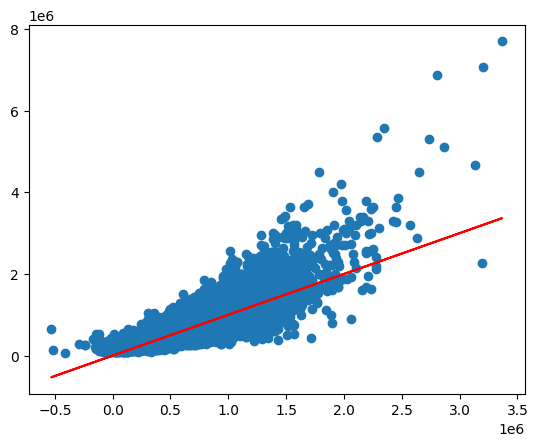

In [ ]:
y_pred_kc_prices = reg_kc_multiple.predict(X_kc_prices)
plt.scatter(y_pred_kc_prices, y_kc_prices)
plt.plot(y_pred_kc_prices, y_pred_kc_prices, c='r')

In [ ]:
X_3_kc_prices = (poly_features_kc_prices := PolynomialFeatures(degree=3)).fit_transform(X_kc_prices)

Здесь мы создали объект трансформации и применили его в одно действие. Для этого используется довольно редки в питоне "моржовый оператор" (walrus operator). Давайте для интереса выведем форму получившегося массива:

In [ ]:
X_3_kc_prices.shape

(21613, 1330)

In [ ]:
reg_poly2_kc = LinearRegression().fit(X_3_kc_prices, y_kc_prices)
reg_poly2_kc.score(X_3_kc_prices, y_kc_prices)

0.8659203541563689

Мы получили значительно более высокий уровень точности - 86,5%. Давайте изобразим отклонения получившейся модели на графике:

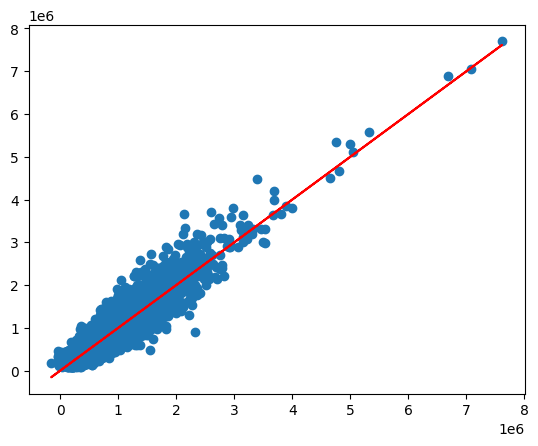

In [ ]:
y_pred_kc_prices = reg_poly2_kc.predict(X_3_kc_prices)
plt.scatter(y_pred_kc_prices, y_kc_prices)
plt.plot(y_pred_kc_prices, y_pred_kc_prices, c='r')

Видно, что модель значительно улучшилась, так как точки сильно ближе к прямой. Таким образом, можно сделать вывод о том, что введение полиномиальных признаков второго порядка опять значительно улучшило модель.

# Задания для самостоятельного выполнения



1.   В выполненной работе добавьте замер времени обучения каждой модели.



In [ ]:
import time

from sklearn.linear_model import LinearRegression
start_time = time.time()
linear = LinearRegression().fit(X, y)
linear_time = time.time() - start_time
print(f"Linear Regression training time: {linear_time:.4f} seconds")

Linear Regression training time: 0.0050 seconds


In [ ]:
from sklearn.preprocessing import PolynomialFeatures
start_time = time.time()
transformation = PolynomialFeatures(degree=2)
transformation.fit(X)
X_2 = transformation.transform(X)
poly_2d = LinearRegression().fit(X_2, y)
poly_time = time.time() - start_time
print(f"Polynomial Regression (degree 2) training time: {poly_time:.4f} seconds")

Polynomial Regression (degree 2) training time: 0.0059 seconds


In [ ]:
from sklearn.linear_model import LogisticRegression
start_time = time.time()
logistic = LogisticRegression().fit(X, y)
logistic_time = time.time() - start_time
print(f"Logistic Regression training time: {logistic_time:.4f} seconds")

Logistic Regression training time: 0.0065 seconds


In [ ]:
class_transform = PolynomialFeatures(degree=3, include_bias=False)
X_3 = class_transform.fit_transform(X)
start_time = time.time()
class_3 = LogisticRegression().fit(X_3, y)
class_poly_time = time.time() - start_time
print(f"Polynomial Logistic Regression (degree 3) training time: {class_poly_time:.4f} seconds")

Polynomial Logistic Regression (degree 3) training time: 0.0081 seconds


In [ ]:
start_time = time.time()
reg_kc_multiple = LinearRegression().fit(X_kc_prices, y_kc_prices)
reg_kc_multiple_time = time.time() - start_time
print(f"Linear Regression on House Prices training time: {reg_kc_multiple_time:.4f} seconds")

Linear Regression on House Prices training time: 0.0235 seconds


In [ ]:
X_3_kc_prices = (poly_features_kc_prices := PolynomialFeatures(degree=3)).fit_transform(X_kc_prices)
start_time = time.time()
reg_poly2_kc = LinearRegression().fit(X_3_kc_prices, y_kc_prices)
poly2_kc_time = time.time() - start_time
print(f"Polynomial Regression (degree 3) on House Prices training time: {poly2_kc_time:.4f} seconds")

Polynomial Regression (degree 3) on House Prices training time: 7.3539 seconds



2.   На датасете "gen_regression" постройте модель пятого, десятого и сотого порядков. Сравните эффективность и время обучения каждой модели.



Degree: 5
R^2: 0.9217
Time: 0.0182 seconds



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


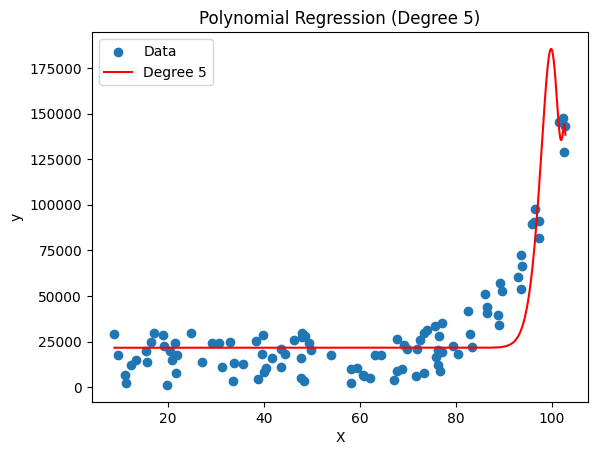

Degree: 10
R^2: 0.9232
Time: 0.0091 seconds



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


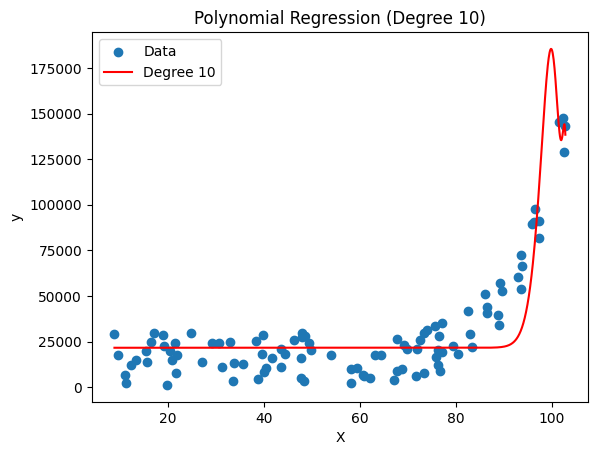

Degree: 100
R^2: 0.7925
Time: 0.0585 seconds



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


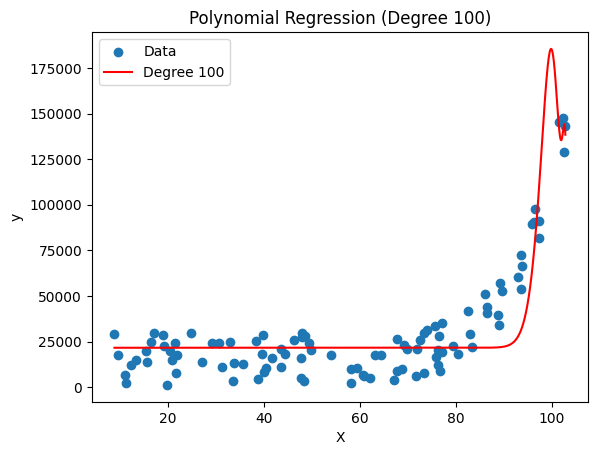

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score
import time

# Загружаем данные
data = pd.read_csv("https://raw.githubusercontent.com/koroteevmv/ML_course/refs/heads/main/ML3.1%20polynomial%20features/data/gen_regression.csv")
X = data.x
y = data.y

# Преобразуем X в DataFrame
X = pd.DataFrame(X)

# Список степеней полинома
degrees = [5, 10, 100]

# Словарь для хранения результатов
results = {}

# Строим модели для каждой степени
for degree in degrees:
    start_time = time.time()  # Засекаем время начала

    # Преобразуем данные с помощью PolynomialFeatures
    transformation = PolynomialFeatures(degree=degree)
    X_transformed = transformation.fit_transform(X)

    # Обучаем модель линейной регрессии
    poly_model = LinearRegression().fit(X_transformed, y)

    # Предсказываем значения для обучения
    y_pred = poly_model.predict(X_transformed)

    # Рассчитываем R^2
    r2 = r2_score(y, y_pred)

    # Засекаем время окончания
    end_time = time.time()

    # Записываем результаты
    results[degree] = {
        'R^2': r2,
        'Time': end_time - start_time
    }

# Выводим результаты
for degree in degrees:
    print(f"Degree: {degree}")
    print(f"R^2: {results[degree]['R^2']:.4f}")
    print(f"Time: {results[degree]['Time']:.4f} seconds\n")

    # Строим графики для каждого порядка
    xx = np.linspace(X.min(), X.max(), 1000).reshape(-1, 1)
    xx_transformed = transformation.transform(xx)
    yy = poly_model.predict(xx_transformed)

    plt.scatter(X, y, label='Data')
    plt.plot(xx, yy, label=f"Degree {degree}", c='r')
    plt.title(f"Polynomial Regression (Degree {degree})")
    plt.xlabel('X')
    plt.ylabel('y')
    plt.legend()
    plt.show()

3. То же самое проделайте с датасетом для классификации и "King county".


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PolynomialFeatures
from time import time

# Загрузка данных
data = pd.read_csv("https://raw.githubusercontent.com/koroteevmv/ML_course/2023/ML3.1%20polynomial%20features/gen_classification.csv", index_col=0)
y = data.y
X = data.drop(["y"], axis=1)

# Функция для обучения модели и вычисления точности и времени
def train_and_evaluate(degree):
    # Преобразуем данные с помощью PolynomialFeatures
    poly = PolynomialFeatures(degree=degree, include_bias=False)
    X_poly = poly.fit_transform(X)

    # Замеряем время обучения
    start_time = time()
    model = LogisticRegression(max_iter=10000)  # Увеличиваем max_iter для больших порядков
    model.fit(X_poly, y)
    end_time = time()

    # Вычисляем точность модели
    accuracy = model.score(X_poly, y)
    training_time = end_time - start_time

    return accuracy, training_time

# Модели 5, 10 и 100 порядков
degrees = [5, 10, 100]
results = {}

for degree in degrees:
    accuracy, training_time = train_and_evaluate(degree)
    results[degree] = {'accuracy': accuracy, 'training_time': training_time}

# Вывод результатов
for degree in degrees:
    print(f"Degree: {degree}")
    print(f"Accuracy: {results[degree]['accuracy']:.4f}")
    print(f"Training time: {results[degree]['training_time']:.4f} seconds\n")


Degree: 5
Accuracy: 0.9160
Training time: 0.0049 seconds

Degree: 10
Accuracy: 0.9240
Training time: 0.0207 seconds

Degree: 100
Accuracy: 0.5000
Training time: 0.0860 seconds



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from time import time

# Загрузка данных
data_kc_prices = pd.read_csv("https://raw.githubusercontent.com/koroteevmv/ML_course/2023/ML3.1%20polynomial%20features/kc_house_data.csv")
y_kc_prices = data_kc_prices.price
X_kc_prices = data_kc_prices.drop(["id", "date", "price"], axis=1)

# Функция для обучения модели и вычисления точности и времени
def train_and_evaluate(degree):
    # Преобразуем данные с помощью PolynomialFeatures
    poly = PolynomialFeatures(degree=degree)
    X_poly = poly.fit_transform(X_kc_prices)

    # Замеряем время обучения
    start_time = time()
    model = LinearRegression()
    model.fit(X_poly, y_kc_prices)
    end_time = time()

    # Вычисляем точность модели (R^2 score)
    accuracy = model.score(X_poly, y_kc_prices)
    training_time = end_time - start_time

    return accuracy, training_time

# Модели 5, 10 и 100 порядков
degrees = [5, 10, 100]
results = {}

for degree in degrees:
    accuracy, training_time = train_and_evaluate(degree)
    results[degree] = {'accuracy': accuracy, 'training_time': training_time}

    # Предсказания
    poly = PolynomialFeatures(degree=degree)
    X_poly = poly.fit_transform(X_kc_prices)
    y_pred = model.predict(X_poly)

    # Построение графика
    plt.figure(figsize=(8, 6))
    plt.scatter(y_pred, y_kc_prices, color='blue', label="Predicted vs Actual")
    plt.plot(y_pred, y_pred, color='red', label="Perfect Prediction Line")
    plt.title(f"Predicted vs Actual (Degree {degree})")
    plt.xlabel("Predicted Prices")
    plt.ylabel("Actual Prices")
    plt.legend()
    plt.show()

# Вывод результатов
for degree in degrees:
    print(f"Degree: {degree}")
    print(f"Accuracy (R^2 score): {results[degree]['accuracy']:.4f}")
    print(f"Training time: {results[degree]['training_time']:.4f} seconds\n")


4. Составьте таблицу эффективности разных моделей для каждой задачи. В таблице должна быть информация о времени обучения модели и получившейся точности. Сделайте вывод о целесообразности применения разных степеней полиномов.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from time import time

# Загрузка данных
data = pd.read_csv("https://raw.githubusercontent.com/koroteevmv/ML_course/refs/heads/main/ML3.1%20polynomial%20features/data/gen_regression.csv")
X = data.x
y = data.y
X = pd.DataFrame(X)

# Функция для обучения модели и вычисления точности и времени
def train_and_evaluate(degree):
    # Преобразуем данные с помощью PolynomialFeatures
    poly = PolynomialFeatures(degree=degree)
    X_poly = poly.fit_transform(X)

    # Замеряем время обучения
    start_time = time()
    model = LinearRegression()
    model.fit(X_poly, y)
    end_time = time()

    # Вычисляем точность модели (R² score)
    accuracy = model.score(X_poly, y)
    training_time = end_time - start_time

    return accuracy, training_time

# Модели с разными степенями полиномов
degrees = [1, 2, 5, 10, 20]
results = {}

# Обучение моделей
for degree in degrees:
    accuracy, training_time = train_and_evaluate(degree)
    results[degree] = {'accuracy': accuracy, 'training_time': training_time}

    # Построение графиков для каждой модели
    poly = PolynomialFeatures(degree=degree)
    X_poly = poly.fit_transform(X)
    model = LinearRegression()
    model.fit(X_poly, y)

# Создание таблицы с результатами
results_df = pd.DataFrame(results).T
results_df.columns = ['R^2 Score', 'Training Time (seconds)']

# Вывод результатов
print(results_df)


    R^2 Score  Training Time (seconds)
1    0.374674                 0.038919
2    0.735975                 0.007511
5    0.921748                 0.001449
10   0.923200                 0.001506
20   0.923443                 0.001472


In [ ]:
import pandas as pd
import numpy as np
import time
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PolynomialFeatures
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Загрузка данных
data = pd.read_csv("https://raw.githubusercontent.com/koroteevmv/ML_course/2023/ML3.1%20polynomial%20features/gen_classification.csv", index_col=0)
y = data.y
X = data.drop(["y"], axis=1)

# Функция для оценки модели
def evaluate_model(X, y, degree=1):
    # Преобразование признаков в полиномиальные признаки
    poly = PolynomialFeatures(degree=degree, include_bias=False)
    X_poly = poly.fit_transform(X)

    # Разделение данных на обучающую и тестовую выборки
    X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.3, random_state=42)

    # Обучение логистической регрессии
    start_time = time.time()
    model = LogisticRegression(max_iter=1000)
    model.fit(X_train, y_train)
    training_time = time.time() - start_time

    # Оценка точности на тестовой выборке
    accuracy = model.score(X_test, y_test)

    return training_time, accuracy

# Создание таблицы для разных степеней полинома
degrees = [1, 2, 3, 4]
results = []

for degree in degrees:
    training_time, accuracy = evaluate_model(X, y, degree)
    results.append({"Degree": degree, "Training Time (seconds)": training_time, "Accuracy": accuracy})

# Преобразование результатов в DataFrame
results_df = pd.DataFrame(results)

# Вывод таблицы
print(results_df)

   Degree  Training Time (seconds)  Accuracy
0       1                 0.012660  0.853333
1       2                 0.009603  0.853333
2       3                 0.011342  0.880000
3       4                 0.014515  0.880000


In [ ]:
import pandas as pd
import numpy as np
import time
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Загрузка данных
data_kc_prices = pd.read_csv("https://raw.githubusercontent.com/koroteevmv/ML_course/2023/ML3.1%20polynomial%20features/kc_house_data.csv")
y_kc_prices = data_kc_prices.price
X_kc_prices = data_kc_prices.drop(["id", "date", "price"], axis=1)

# Функция для оценки модели
def evaluate_model(X, y, degree=1):
    # Преобразование признаков в полиномиальные признаки
    poly = PolynomialFeatures(degree=degree)
    X_poly = poly.fit_transform(X)

    # Разделение данных на обучающую и тестовую выборки
    X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.3, random_state=42)

    # Обучение линейной регрессии
    start_time = time.time()
    model = LinearRegression()
    model.fit(X_train, y_train)
    training_time = time.time() - start_time

    # Оценка точности на тестовой выборке (R^2)
    score = model.score(X_test, y_test)

    return training_time, score

# Степени полиномов для оценки
degrees = [1, 2, 3]
results = []

# Оценка моделей для разных степеней полиномов
for degree in degrees:
    training_time, score = evaluate_model(X_kc_prices, y_kc_prices, degree)
    results.append({"Degree": degree, "Training Time (seconds)": training_time, "R^2 Score": score})

# Преобразование результатов в DataFrame
results_df = pd.DataFrame(results)

# Вывод таблицы
print(results_df)

   Degree  Training Time (seconds)  R^2 Score
0       1                 0.020339   0.699463
1       2                 1.078779   0.805397
2       3                 5.379277  -0.769392


5. Для линейной модели в задаче о продаже домов выведите коэффициенты модели и названия соответствующих атрибутов. Сделайте вывод об относительной важности атрибутов.

        Attribute    Coefficient
14            lat  602748.226449
5      waterfront  582960.458423
8           grade   95890.445151
6            view   52870.942384
1       bathrooms   41144.278532
7       condition   26385.649139
4          floors    6689.550115
2     sqft_living     110.442865
9      sqft_above      70.785224
10  sqft_basement      39.657640
16  sqft_living15      21.681400
12   yr_renovated      19.812584
3        sqft_lot       0.128598
17     sqft_lot15      -0.382642
13        zipcode    -582.419866
11       yr_built   -2620.223211
0        bedrooms  -35766.541444
15           long -214729.828253


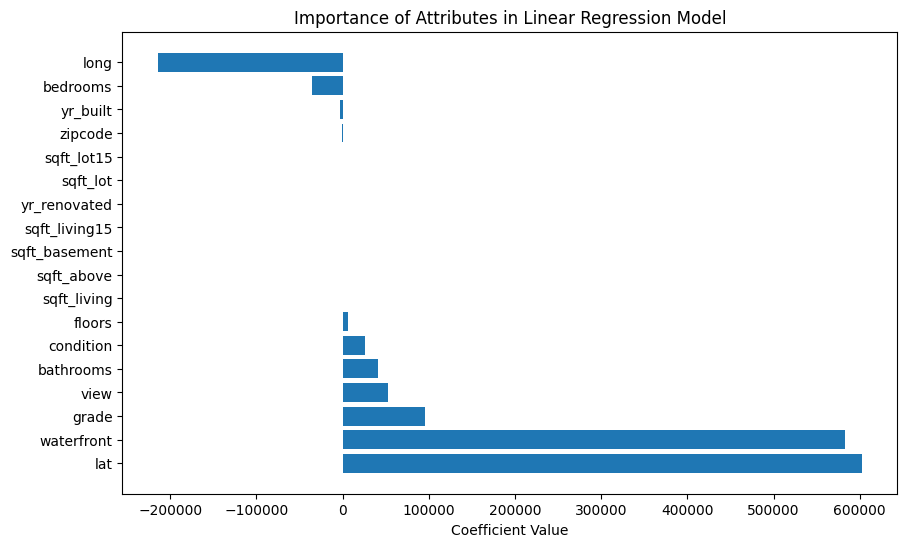

In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression

# Загрузка данных
data_kc_prices = pd.read_csv("https://raw.githubusercontent.com/koroteevmv/ML_course/2023/ML3.1%20polynomial%20features/kc_house_data.csv")

# Целевая переменная и признаки
y_kc_prices = data_kc_prices.price
X_kc_prices = data_kc_prices.drop(["id", "date", "price"], axis=1)

# Обучение линейной регрессии
reg_kc_multiple = LinearRegression().fit(X_kc_prices, y_kc_prices)

# Получаем коэффициенты и атрибуты
coefficients = reg_kc_multiple.coef_
attributes = X_kc_prices.columns

# Создаем DataFrame для вывода коэффициентов
coefficients_df = pd.DataFrame({
    'Attribute': attributes,
    'Coefficient': coefficients
})

# Сортируем по величине коэффициентов, чтобы увидеть самые важные атрибуты
coefficients_df = coefficients_df.sort_values(by='Coefficient', ascending=False)

# Вывод таблицы с коэффициентами
print(coefficients_df)

# Визуализация важности признаков
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.barh(coefficients_df['Attribute'], coefficients_df['Coefficient'])
plt.xlabel('Coefficient Value')
plt.title('Importance of Attributes in Linear Regression Model')
plt.show()


6. Попробуйте также проинтерпретировать полиномиальную модель.

In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

# Загрузка данных
data_kc_prices = pd.read_csv("https://raw.githubusercontent.com/koroteevmv/ML_course/2023/ML3.1%20polynomial%20features/kc_house_data.csv")

# Целевая переменная и признаки
y_kc_prices = data_kc_prices.price
X_kc_prices = data_kc_prices.drop(["id", "date", "price"], axis=1)

# Преобразование признаков в полиномиальные
poly_features_kc_prices = PolynomialFeatures(degree=3)
X_poly_kc_prices = poly_features_kc_prices.fit_transform(X_kc_prices)

# Обучение линейной регрессии на полиномиальных признаках
reg_poly_kc = LinearRegression().fit(X_poly_kc_prices, y_kc_prices)

# Получаем коэффициенты и атрибуты
coefficients_poly = reg_poly_kc.coef_
attributes_poly = poly_features_kc_prices.get_feature_names_out(X_kc_prices.columns)

# Создаем DataFrame для вывода коэффициентов
coefficients_poly_df = pd.DataFrame({
    'Attribute': attributes_poly,
    'Coefficient': coefficients_poly
})

# Сортируем по величине коэффициентов
coefficients_poly_df = coefficients_poly_df.sort_values(by='Coefficient', ascending=False)

# Вывод таблицы с коэффициентами
print(coefficients_poly_df)


                               Attribute  Coefficient
428   bathrooms waterfront sqft_basement   182.552270
795      floors waterfront sqft_living15   176.137882
870            floors long sqft_living15   166.908073
844            floors sqft_basement long   163.215572
441              bathrooms view yr_built   157.088848
...                                  ...          ...
1201                 sqft_above lat long  -515.831926
641                 sqft_living lat long  -537.204628
1312                 lat^2 sqft_living15  -589.586896
1200                    sqft_above lat^2  -810.281642
640                    sqft_living lat^2  -871.335655

[1330 rows x 2 columns]


# Контрольные вопросы

1. В чем заключается суть метода множественной регрессии?

Множественная регрессия — это метод статистического анализа, используемый для моделирования зависимой переменной (или отклика) как функции нескольких независимых переменных (или признаков). В простых словах, он позволяет предсказать значение зависимой переменной, учитывая влияние нескольких факторов одновременно. Множественная регрессия расширяет линейную регрессию на несколько признаков, вычисляя веса (коэффициенты) для каждого признака, которые минимизируют ошибку прогноза.


2. Какие основные недостатки применения полиномиальных признаков на практике?

Основные недостатки применения полиномиальных признаков:

Переобучение (overfitting): При использовании полиномиальных признаков с высокой степенью можно создать модель, которая слишком хорошо подгоняет данные, но плохо обобщает на новых данных. Это приводит к переобучению.
Рост сложности модели: Добавление полиномиальных признаков увеличивает количество признаков в модели, что может привести к увеличению времени обучения и вычислительных затрат.
Сложность интерпретации: После добавления полиномиальных признаков (например, взаимодействий или квадратов) интерпретировать вклад каждого признака становится сложнее.
Чувствительность к шуму в данных: Полиномиальные признаки могут усилить влияние случайных колебаний в данных (шум), что ухудшит качество модели.

3. В каких случая введение полиномиальных признаков может быть полезным?

Введение полиномиальных признаков полезно в следующих случаях:

Нелинейные зависимости: Если данные имеют нелинейные зависимости между признаками и целевой переменной, полиномиальные признаки могут помочь выявить эти зависимости.
Улучшение точности модели: При наличии сложных зависимостей между признаками, которые не могут быть адекватно выражены линейной моделью, добавление полиномиальных признаков может улучшить модель.
Повышение гибкости модели: Полиномиальные признаки позволяют модели более гибко подстраиваться под данные, улучшая точность предсказаний в случаях, когда простая линейная регрессия не справляется.

4. Как растет требование к объему оперативной памяти при введении полиномиальных признаков?

Требования к объему оперативной памяти растут экспоненциально с увеличением степени полинома. Для каждого признака полиномиальные признаки создают новые комбинации, которые увеличивают размерность данных. Например, при степени полинома 2 для двух признаков будут добавлены не только квадраты каждого признака, но и их взаимодействие, что существенно увеличит количество признаков. С увеличением степени количество новых признаков растет по степени, что приводит к большому количеству данных и, как следствие, к большему потреблению памяти и времени обработки.

5. Почему при введении полиномиальных признаков нужно добавить все комбинации атрибутов до заданной степени?

Необходимо добавить все комбинации атрибутов до заданной степени, чтобы модель могла учесть все возможные взаимодействия между признаками. Если добавить только отдельные полиномиальные признаки, модель не будет учитывать возможные взаимодействия между ними. Например, для двух признаков x1 и x2 степени 2 модель должна включать не только x1 в степени 2, x2 в степени 2, но и их взаимодействие x1 умножить на x2. В противном случае модель может пропустить важные зависимости и не будет учитывать все возможные способы влияния признаков на целевую переменную.

6. Почему на последнем графике линия получается прямая, хотя мы используем нелинейную модель?

На последнем графике линия получается прямой, потому что хотя модель и использует полиномиальные признаки, она может иметь лишь несколько признаков и сравнительно низкую степень полинома. Если степень полинома низкая (например, 2 или 3), то модель может быть в состоянии аппроксимировать зависимость линейно или почти линейно, даже при наличии полиномиальных признаков. Также, если в данных не содержится выраженных нелинейных зависимостей, модель может не использовать сложные полиномиальные признаки и по-прежнему подстраиваться под данные линейно.